In [108]:
%matplotlib inline
import tweepy
import time
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [109]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [110]:
Targets = ["@CBSNews", "@cnnbrk", "@FoxNews","@BBCNews", "@nytimes"]


# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

users = []
dates = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
counters = []
text_list = []

for target in Targets:

    oldest_tweet = None
    counter = 1
    for x in range(5):
            
            public_tweets = api.user_timeline(
            target, count=20, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
            for tweet in public_tweets:
                    try:
            
                            counter += 1
                            oldest_tweet = tweet["id"] - 1
                            results = analyzer.polarity_scores(tweet["text"])
                            
                            users.append(target)
                            dates.append(tweet["created_at"])
                            counters.append(counter) 
                            compound_list.append(results["compound"])
                            positive_list.append(results["pos"])
                            negative_list.append(results["neg"])
                            neutral_list.append(results["neu"])
                            text_list.append(tweet["text"])



                     
                    except tweepy.TweepError:
                        print("Failed to run the command on that user, Skipping...")


In [111]:
colors = ["teal", "green", "red", "blue", "yellow"]
sentiments = {"User" : users,
    "Date": dates, 
    "Compound": compound_list,
    "Positive": positive_list,
    "Negative": negative_list,
    "Neutral": neutral_list,
    "Tweets Ago": counters,
    "Text" : text_list}
Sentiments = pd.DataFrame(sentiments)
Sentiments.head()

,User,Date,Compound,Positive,Negative,Neutral,Tweets Ago,Text
0,@CBSNews,Fri Oct 05 01:35:28 +0000 2018,-0.5574,0.000,0.146,0.854,2,WATCH: Singer Janis Joplin died 48 years ago t...
1,@CBSNews,Fri Oct 05 01:14:41 +0000 2018,0.3818,0.178,0.000,0.822,3,1-year-old girl found alive under debris from ...
2,@CBSNews,Fri Oct 05 00:54:32 +0000 2018,-0.4588,0.000,0.130,0.870,4,Elon Musk is taunting the government regulator...
3,@CBSNews,Fri Oct 05 00:34:56 +0000 2018,-0.0258,0.131,0.136,0.733,5,Kavanaugh fight rallies GOP ahead of midterms:...
4,@CBSNews,Fri Oct 05 00:14:44 +0000 2018,-0.5574,0.000,0.295,0.705,6,Anti-Kavanaugh protesters take over Senate bui...


Text(0.5,0,'Tweets Ago')

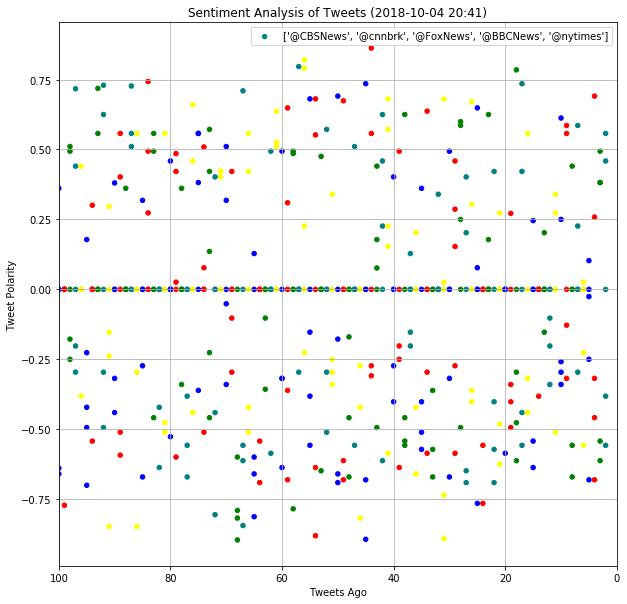

In [116]:


Sentiments.plot.scatter("Tweets Ago", "Compound", color=colors, figsize=(10, 10), subplots=False, label=Targets, grid=True)
plt.legend(loc=0)
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now})")
plt.xlim(100,0)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")


AttributeError: module 'matplotlib.pyplot' has no attribute 'hline'

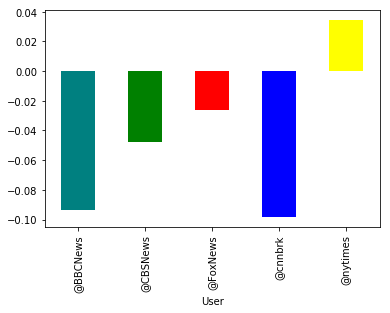

In [115]:
averages = Sentiments.groupby("User").mean()
averages = averages["Compound"]
averages.plot(kind="bar", color=colors)
plt.hline(0)

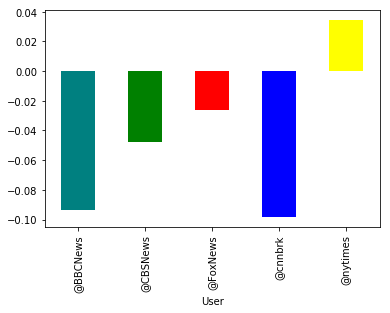

In [13]:
public_tweets[1]

{'created_at': 'Fri Oct 05 00:48:47 +0000 2018',
 'id': 1048012086440341504,
 'id_str': '1048012086440341504',
 'text': "Here's a list of early voting dates for the states that allow it [corrected typo] https://t.co/8MImT5BwcA",
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/8MImT5BwcA',
    'expanded_url': 'https://nyti.ms/2O3Y9My',
    'display_url': 'nyti.ms/2O3Y9My',
    'indices': [82, 105]}]},
 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 807095,
  'id_str': '807095',
  'name': 'The New York Times',
  'screen_name': 'nytimes',
  'location': 'New York City',
  'description': 'Where the conversation begins. Follow for breaking news, special reports, RTs of our journalists and more. Visit https: